<a href="https://colab.research.google.com/github/Reubenpt123/DAV/blob/main/Neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import *
from keras.utils import np_utils

In [99]:
cd d:\My Drive\Colab Notebooks\DAV Assessment\cefas_smartBuoy

d:\My Drive\Colab Notebooks\DAV Assessment\cefas_smartBuoy


We're also missing a lot of Kd values, so we'll train a model here with Kd and then again elsewhere without Kd and compare their performances.

In [100]:
df = pd.read_csv('clean_ext_data.csv', parse_dates = ['dateTime'])
df = df.set_index('dateTime')
df = df.drop('kd', axis = 1)
df = df.dropna()

phase_0 = df.loc[df['phase'] == 0, :].copy()
X = phase_0.drop(['fluors', 'phase'], axis = 1).copy()
y = phase_0['fluors'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# standardize the data
scaler = StandardScaler()
#train the scaler on the training data
X_train = scaler.fit_transform(X_train)
#apply the scaler to the test data sets
X_test = scaler.transform(X_test)
X = scaler.transform(X)

In [119]:
model = Sequential()
model.add(Dense(units = 1000, activation = "relu", input_shape = (4, )))
model.add(Dropout(0.4))
model.add(Dense(units = 500, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(units = 100, activation = "relu"))
model.add(Dense(1, activation = "relu"))
model.summary()
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ['mean_squared_error'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 1000)              5000      
                                                                 
 dropout_23 (Dropout)        (None, 1000)              0         
                                                                 
 dense_33 (Dense)            (None, 500)               500500    
                                                                 
 dropout_24 (Dropout)        (None, 500)               0         
                                                                 
 dense_34 (Dense)            (None, 100)               50100     
                                                                 
 dense_35 (Dense)            (None, 1)                 101       
                                                                 
Total params: 555,701
Trainable params: 555,701
Non-tr

In [120]:
no_epochs = 20
history = model.fit(X_train, y_train, batch_size = 20, epochs = no_epochs, verbose = 1, validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 1)

Epoch 1/20
1504/1504 [==============================] - 15s 10ms/step - loss: 2.7119 - mean_squared_error: 2.7119 - val_loss: 2.4904 - val_mean_squared_error: 2.4904
Epoch 2/20
1504/1504 [==============================] - 15s 10ms/step - loss: 2.1950 - mean_squared_error: 2.1950 - val_loss: 1.8721 - val_mean_squared_error: 1.8721
Epoch 3/20
1504/1504 [==============================] - 14s 10ms/step - loss: 1.9007 - mean_squared_error: 1.9007 - val_loss: 1.8022 - val_mean_squared_error: 1.8022
Epoch 4/20
1504/1504 [==============================] - 13s 8ms/step - loss: 1.8569 - mean_squared_error: 1.8569 - val_loss: 1.6458 - val_mean_squared_error: 1.6458
Epoch 5/20
1504/1504 [==============================] - 13s 9ms/step - loss: 1.7997 - mean_squared_error: 1.7997 - val_loss: 1.6618 - val_mean_squared_error: 1.6618
Epoch 6/20
1504/1504 [==============================] - 15s 10ms/step - loss: 1.7763 - mean_squared_error: 1.7763 - val_loss: 1.4731 - val_mean_squared_error: 1.4731
Epoch 

In [121]:
pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train)))
pred_test = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_test)))

940/940 [==============================] - 1s 1ms/step
1.1680544619099238
403/403 [==============================] - 0s 1ms/step
1.180547687645215


In [122]:
#model.save('model.h5')

In [123]:
#model = keras.models.load_model('model.h5')
pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train)))
pred_test = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_test)))
y_pred = model.predict(X)
print(np.sqrt(mean_squared_error(y, y_pred)))

940/940 [==============================] - 1s 1ms/step
1.1680544619099238
403/403 [==============================] - 1s 1ms/step
1.180547687645215
1343/1343 [==============================] - 2s 1ms/step
1.1718165024101102


C:\Users\709583\AppData\Local\Temp\ipykernel_10472\2785355678.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


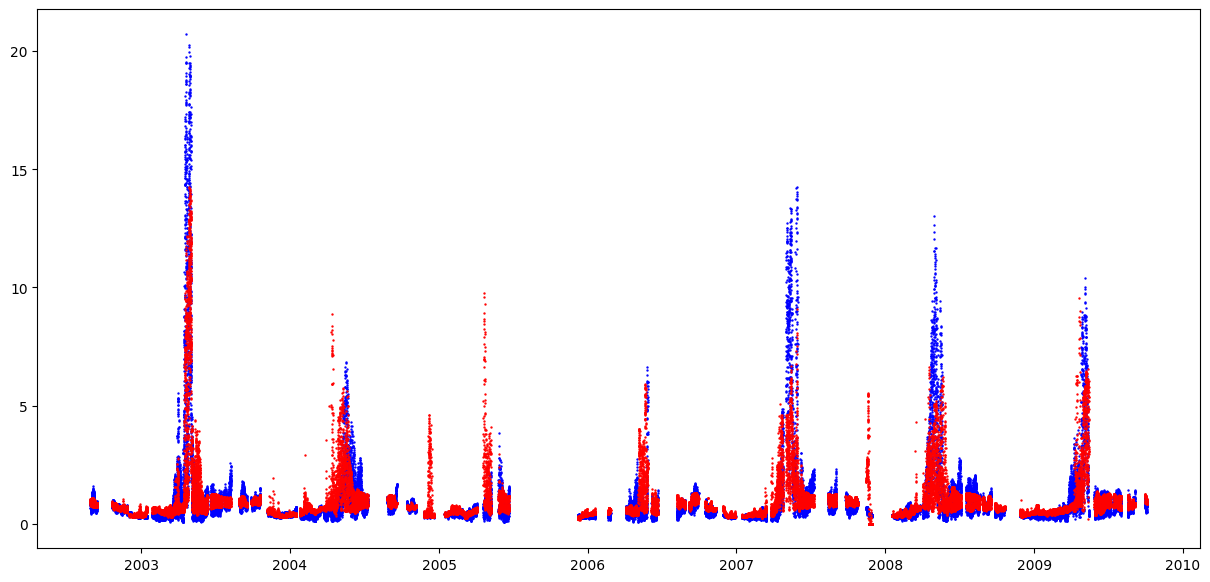

In [124]:
phase_0.loc[:, 'y_pred'] = y_pred
fig, ax = plt.subplots(figsize = (15, 7))
ax.scatter(phase_0.index, phase_0['fluors'], s = 0.5, color = 'blue')
ax.scatter(phase_0.index, phase_0['y_pred'], s = 0.5, color = 'red')
#fig.savefig('predictions.png')
fig.show()

phase_0.drop(['sal', 'ftu', 'surf_temp', 'phase', 'direct_solar'], axis = 1).to_csv('phase_0_predictions.csv', index = 'false', sep = ',')

C:\Users\709583\AppData\Local\Temp\ipykernel_10472\978024357.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


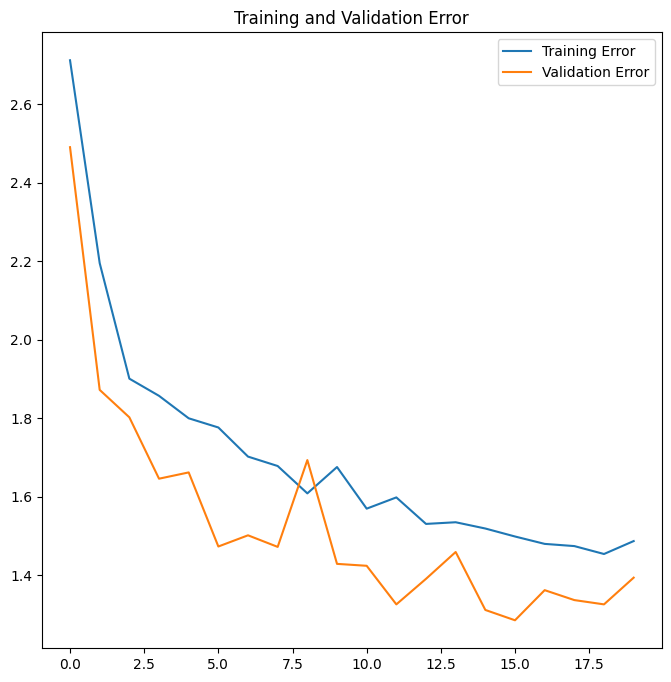

In [125]:
epochs_range = range(no_epochs)
train_err = history.history['mean_squared_error']
validation_err = history.history['val_mean_squared_error']
train_loss = history.history['loss']
validation_loss = history.history['val_loss']

fig, ax = plt.subplots(figsize = (8,8))
ax.plot(epochs_range, train_err, label = 'Training Error')
ax.plot(epochs_range, validation_err, label = 'Validation Error')
ax.legend(loc = 'upper right')
ax.set_title('Training and Validation Error')
fig.show()

In [126]:
phase_1 = df.loc[df['phase'] > 0, :].copy()
X_1 = phase_1.drop(['fluors', 'phase'], axis = 1).copy()
y_1 = phase_1.loc[:, 'fluors'].copy()
scaler = StandardScaler()
X_1 = scaler.fit_transform(X_1)
y_1_pred = model.predict(X_1)
print(np.sqrt(mean_squared_error(y_1, y_1_pred)))
phase_1.drop(['sal', 'ftu', 'surf_temp', 'phase', 'direct_solar'], axis = 1).to_csv('phase_1_predictions.csv', index = 'false', sep = ',')

1904/1904 [==============================] - 3s 1ms/step
1.331860512019502


C:\Users\709583\AppData\Local\Temp\ipykernel_10472\2978685884.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


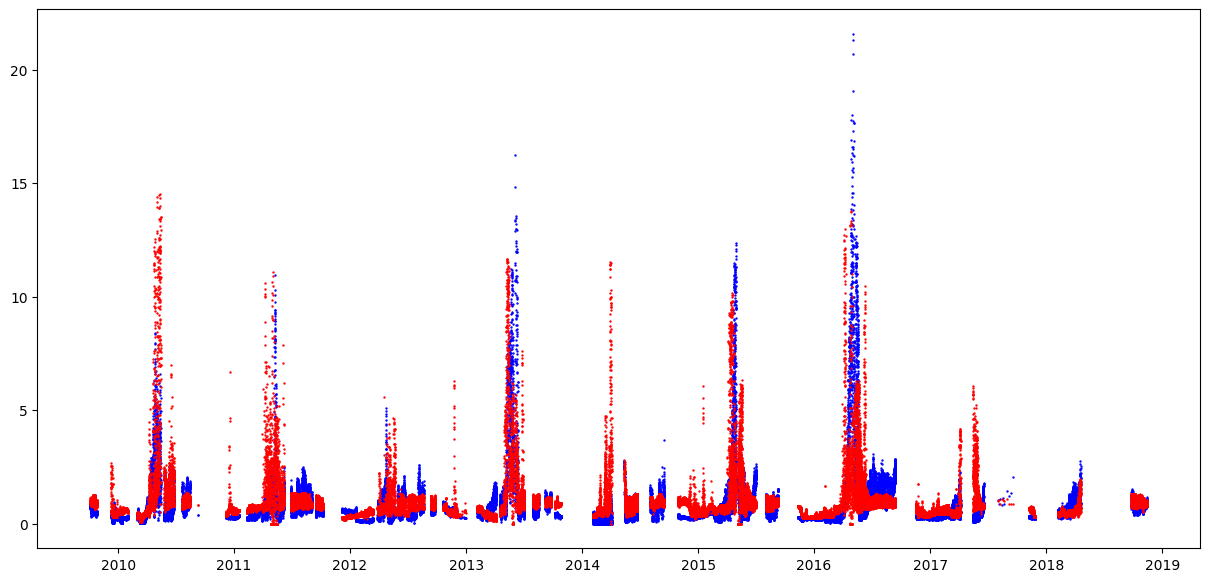

In [127]:
phase_1['y_1_pred'] = y_1_pred
fig, ax = plt.subplots(figsize = (15, 7))
ax.scatter(phase_1.index, phase_1['fluors'], s = 0.5, color = 'blue')
ax.scatter(phase_1.index, phase_1['y_1_pred'], s = 0.5, color = 'red')
#fig.savefig('future_predictions.png')
fig.show()